In [26]:
import numpy as np 
import seaborn as sns
import pandas as pd 

In [27]:
# KNN inplementation from scratch - for binary classification 
# here we are creating KNN without the sklearn 
# KNN it means that finding the highest number of nearest values from dots point


# intialize 
class KNNClassifier:
    def __init__(self, k= 3):  # k is number is nearest neighbors
        self.k = k

    # calculate distance between two points
    def _euclidean_dist(self,x1,x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
       
    # it use to only store it the values 
    def fit(self,X,y):
        self.X_train = X
        self.y_train = y

    # this is how we calculate the distance between single data point and to all the different training data points
    def _predict_one(self,x):
        distance = [self._euclidean_dist(x,x_train) for x_train in self.X_train]   # calculate the distance between test point x and all training points

        # here we have find the k nearest nevers
        knn_indices = np.argsort(distance)[:self.k]

        # k nearest nevers class
        knn_classes  = [self.y_train[i] for i in knn_indices]

        # majority class and here bincount it means that count the number of highest which data point nearest apper
        majority_class = np.argmax(np.bincount(knn_classes))
        return majority_class

    def predict(self,X):
        y_pred = [self._predict_one(x) for x in X]
        return y_pred

In [28]:
X_train = np.array([
    [1,2],
    [2,3],
    [3,3],
    [6,5],
    [7,7]
])

y_train = np.array([0,0,0,1,1])

X_test = np.array([
    [2,2],
    [6,6]
])

model = KNNClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print(y_pred)

[0, 1]


<Axes: xlabel='x1', ylabel='x2'>

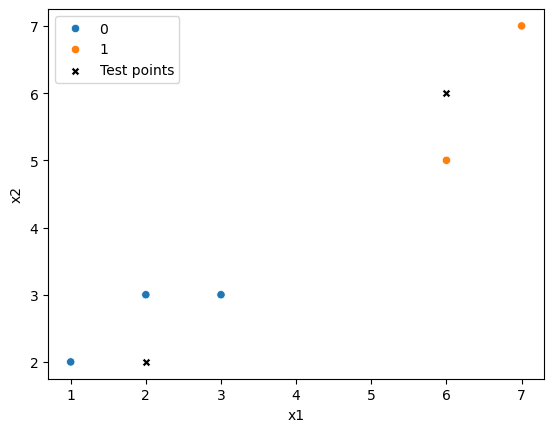

In [29]:
# Visualize 
X_train_df = pd.DataFrame(X_train,columns = ["x1","x2"])
X_train_df["label"] = y_train

sns.scatterplot(
    data = X_train_df ,
    x = "x1",
    y = "x2",
    hue = "label"
)

X_test_df = pd.DataFrame(X_test, columns = ["x1","x2"])

sns.scatterplot(
    data = X_test_df ,
    x = "x1",
    y = "x2",
    color = "black",
    marker = "X",
    label = "Test points"
)

In [12]:
X_train_df

,x1,x2,label
0,1,2,0
1,2,3,0
2,3,3,0
3,6,5,1
4,7,7,1


In [9]:
X_train_df

,x1,x2,label
0,1,2,0
1,2,3,0
2,3,3,0
3,6,5,1
4,7,7,1
